In [ ]:
####################################################################################
# create and save for samebasin intake files
#cityrivnum = f'{h08dir}/global_city/dat/riv_num_/city_basins.json'
#city_basins_list
####################################################################################
    
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

####################################################################################
city_len = 1860
distance = 100
ex_flg = False
####################################################################################

# paths
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
riv_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivnum_path = f'{h08dir}/global_city/dat/riv_num_/rivnum.CAMA.gl5'
rivnxl_path = f"{h08dir}/global_city/dat/riv_nxl_/rivnxl.CAMA.gl5"
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
cnt_dir = f'{h08dir}/global_city/dat/cty_cnt_/gpw4'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

# intake
int_dir = f'{h08dir}/global_city/dat/cty_int_/{distance}km_samebasin'

# rivpath
rivnxl_gl5 = np.fromfile(rivnxl_path, 'float32').reshape(2160, 4320)
pop = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
rivout = np.fromfile(riv_path, dtype='float32').reshape(2160, 4320)
rivnum_gl5 = np.fromfile(rivnum_path, dtype='float32').reshape(2160, 4320)

# lonlat
lonlat_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/WUP2018_300k_2010.txt'
with open(lonlat_path, "r") as input_file:
    lines = input_file.readlines()

# identifying same rivnum cities into list?
city_basins = {}
for i in range(city_len):
    city_num = i+1
    ctymsk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    int_path = f'{int_dir}/city_{city_num:08}.gl5'

    if not os.path.exists(prf_path):
        print(f'{city_num} is invalid prf')

    else:
        ctymsk = np.fromfile(ctymsk_path, dtype='float32').reshape(2160, 4320)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        intake = np.fromfile(int_path, dtype='float32').reshape(2160, 4320)
        rivnum_mask = np.ma.masked_where((intake+prf) == 0, rivnum_gl5)
        rivnum_lst = np.unique(rivnum_mask)[:-1]
        city_basins[city_num] = rivnum_lst.filled(1e20)
        
        print(f'{city_num} done')

print(city_basins)

"""
basin_to_cities = {}
for city, basins in city_basins.items():
    for rivnum in basins:
        if rivnum not in basin_to_cities:
            basin_to_cities[rivnum] = []
        basin_to_cities[rivnum].append(city)

# 集計結果を出力
for rivnum, cities in basin_to_cities.items():
    if len(cities) > 1:  # 複数の都市に共有されている流域番号のみ表示
        print(f"rivnum {rivnum}: {cities}")

import json
city_basins_list = {city: basins.tolist() for city, basins in city_basins.items()}
cityrivnum = f'{h08dir}/global_city/dat/riv_num_/city_basins_{distance}km.json'
with open(cityrivnum, 'w') as json_file:
    json.dump(city_basins_list, json_file)
print(f'{cityrivnum} saved')
"""

1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done


In [3]:
####################################################################################
# create and save below files
#basin_cities_path = f'{h08dir}/global_city/dat/riv_num_/basin_to_cities.json'
#new_basin_to_cities
####################################################################################

import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)

def nxtl2nxtxy(rgnfile, upperindex, leftindex):
    vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
    riv_nxtxy = np.empty(rgnfile.shape, dtype=tuple)
    mask = ~np.isnan(rgnfile)
    riv_nxtxy[mask] = vfunc(rgnfile[mask])
    riv_nxtxy_shape = (riv_nxtxy.shape[0], riv_nxtxy.shape[1], 2)
    
    riv_nxtxy_lst = []
    for row in riv_nxtxy:
        for y, x in row:
            modified_y = y - upperindex
            modified_x = x - leftindex
            riv_nxtxy_lst.append((modified_y, modified_x))

    riv_nxtxy_cropped = np.array(riv_nxtxy_lst).reshape(riv_nxtxy_shape)
    riv_nxtxy_cropped = riv_nxtxy_cropped.astype(int)
    return riv_nxtxy_cropped
    
################################################################################
# load files
################################################################################

# rivnxl in xy coord
riv_nxlonlat_cropped = nxtl2nxtxy(rivnxl_gl5, 0, 0)

# basin at each city
cityrivnum = f'{h08dir}/global_city/dat/riv_num_/city_basins.json'
with open(cityrivnum, 'r') as json_file:
    city_basins = json.load(json_file)
print(len(city_basins.keys()))

# cities at same basin
basin_to_cities = {}
for city, basins in city_basins.items():
    for rivnum in basins:
        if rivnum not in basin_to_cities:
            basin_to_cities[rivnum] = []
        basin_to_cities[rivnum].append(city)
        
for rivnum, cities in basin_to_cities.items():
    if len(cities) > 1:  # 複数の都市に共有されている流域番号のみ表示
        print(f"rivnum {rivnum}: {cities}")
        
new_basin_to_cities = {rivnum: cities for rivnum, cities in basin_to_cities.items() if len(cities) > 1}
basin_cities_path = f'{h08dir}/global_city/dat/riv_num_/basin_to_cities.json'
"""
with open(basin_cities_path, 'w') as json_file:
    json.dump(new_basin_to_cities, json_file)
    print(f'{basin_cities_path} saved')
"""

1553
rivnum 848.0: ['1', '936', '1283', '1400']
rivnum 14.0: ['2', '11', '126', '130', '133', '188', '197', '217', '243', '319', '321', '363', '406', '455', '463', '473', '513', '526', '588', '667', '669', '673', '677', '797', '883', '903', '941', '983', '1012', '1018', '1067', '1089', '1181', '1216', '1253', '1288', '1298', '1337', '1365', '1371', '1381', '1422', '1575', '1578', '1620', '1652', '1656', '1668', '1697', '1712', '1718', '1824']
rivnum 480.0: ['3', '52', '85', '144', '160', '612', '618', '967', '1200', '1299', '1376', '1687']
rivnum 5438.0: ['3', '85']
rivnum 164.0: ['4', '537', '933']
rivnum 5.0: ['5', '94', '119', '140', '155', '196', '257', '343', '550', '597', '629', '689', '789', '803', '836', '837', '866', '1235', '1327', '1329', '1361', '1411', '1453', '1500', '1530', '1573', '1648', '1720']
rivnum 4.0: ['9', '71', '200', '579', '691', '746', '1551', '1579', '1667', '1675', '1676', '1747']
rivnum 172.0: ['10', '183', '334', '386', '910', '1265', '1439']
rivnum 1124

"\nwith open(basin_cities_path, 'w') as json_file:\n    json.dump(new_basin_to_cities, json_file)\n    print(f'{basin_cities_path} saved')\n"

In [4]:
####################################################################################
# edgesは2都市間のupstreamとdownstreamの関係をすべて保存したリスト
####################################################################################

def updown(new_basin_to_cities, key_index=0):
    # get uid and city list
    keys_list = list(new_basin_to_cities.keys())
    uid = keys_list[key_index]
    print(f'uid: {uid}')
    rivnum_list = new_basin_to_cities[uid]
    rivnum_list = [int(i) for i in rivnum_list]
    
    # remove overlap
    overlap_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/overlap_hidden_only.txt'
    with open(overlap_path, 'r') as f:
        numbers = [int(line.strip()) for line in f]
    rivnum_list_removed = [num for num in rivnum_list if num not in numbers]
    rivnum_list_removed = [int(i) for i in rivnum_list_removed]
    print('cities in uid')
    print(rivnum_list_removed)
    
    # coord of purficication
    coords_a = []
    for city_num in rivnum_list_removed:
        prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        uid = int(float(uid))
        prf_coord = np.where((prf == 1) & (rivnum_gl5 == uid))
        coords_a.append(prf_coord)
    print(coords_a)
    #print(coords_a)
    
    # down??
    edges = []
    riv_path_array = np.zeros((2160, 4320))
    for cid in range(len(coords_a)):
        visited_coords = set()
        riv_path_array[coords_a[cid][0][0], coords_a[cid][1][0]] = cid
        
        coords_b = coords_a.copy()
        coords_b.pop(cid) 
        cind_list = rivnum_list_removed.copy()
        cind_list.pop(cid)
        
        if len(coords_a) > 0:
            target_coord = (coords_a[cid][0][0], coords_a[cid][1][0])
            
            while True:
                if target_coord in visited_coords:
                    break
                visited_coords.add(target_coord)
                
                next_coord = riv_nxlonlat_cropped[target_coord[0], target_coord[1]]
                if next_coord.size == 0 or next_coord.shape != (2,):
                    break
                
                next_coord = (next_coord[0], next_coord[1])
                riv_path_array[next_coord[0], next_coord[1]] = cid
                target_coord = next_coord
        
        for cind, coord in enumerate(coords_b):
            standard_coord = (coord[0][0], coord[1][0])
            if standard_coord in visited_coords:
                #print(f"upstream: city{rivnum_list_removed[cid]}, downstream: city{cind_list[cind]}")
                edges.append((rivnum_list_removed[cid], cind_list[cind]))
            #else:
                #print("no city in downstream")

    # edgesは2都市間のupstreamとdownstreamの関係をすべて保存したリスト
    return edges, riv_path_array, coords_a, rivnum_list_removed

In [5]:
####################################################################################
# すべての流域を含むresult_dictを作成
# 同じ流域に含まれる各都市のwater availability, upstream citiesを保存している．cities_with_upstreamが存在する場合，flag=Trueとなる
####################################################################################

def find_upstream_cities(edges, city_number):
    cities_with_upstream = []
    cities_without_upstream = []
    upstream_cities = [edge[0] for edge in edges if edge[1] == city_number]
    uup = np.unique(upstream_cities)
    
    for i in uup:
        if any(edge[1] == i for edge in edges):
            # 上流にさらに都市が存在する場合
            cities_with_upstream.append(i)
        else:
            # 上流にこれ以上都市が存在しない場合
            cities_without_upstream.append(i)
    
    return cities_with_upstream, cities_without_upstream, uup
    
edges, riv_path_array, coords_a, rivnum_list_removed = updown(new_basin_to_cities, key_index=1)
unique_cities_basin = np.unique(edges)
# unique_cties_basin: uniqueなすべての都市
# uup: 各都市の上流にあるuniqueな都市

result_dict = {}
for city_number in unique_cities_basin:
    cities_with_upstream, cities_without_upstream, uup = find_upstream_cities(edges, city_number)
    if cities_with_upstream:
        result_dict[city_number] = [1, True, uup]
    elif not cities_with_upstream and cities_without_upstream:
        result_dict[city_number] = [1, False, uup]
    else:
        result_dict[city_number] = [1, 'Done', uup]

# 同じ流域に含まれる各都市のwater availability, upstream citiesを保存している．cities_with_upstreamが存在する場合，flag=Trueとなる

uid: 14.0
cities in uid
[2, 11, 126, 130, 133, 188, 197, 217, 243, 319, 321, 363, 406, 455, 463, 473, 513, 526, 588, 667, 669, 673, 677, 797, 883, 903, 941, 983, 1012, 1018, 1067, 1089, 1181, 1216, 1253, 1288, 1298, 1337, 1365, 1371, 1422, 1578, 1620, 1652, 1656, 1697, 1712, 1718, 1824]
[(array([737]), array([3082])), (array([790]), array([3245])), (array([755]), array([3068])), (array([761]), array([3123])), (array([757]), array([3130])), (array([808]), array([3070])), (array([772]), array([3181])), (array([801]), array([3087])), (array([753]), array([3095])), (array([776]), array([3152])), (array([731]), array([3093])), (array([775]), array([3140])), (array([767]), array([3094])), (array([779]), array([3068])), (array([738]), array([3113])), (array([765]), array([3261])), (array([745]), array([3097])), (array([732]), array([3106])), (array([787]), array([3222])), (array([714]), array([3097])), (array([757]), array([3159])), (array([759]), array([3220])), (array([719]), array([3091]))

In [6]:
for key in result_dict:
    value = result_dict[key]
    print(key, value)

2 [1, True, array([1253, 1288, 1620])]
126 [1, 'Done', array([], dtype=float64)]
130 [1, False, array([ 321,  463,  526, 1371, 1656, 1824])]
133 [1, 'Done', array([], dtype=float64)]
188 [1, 'Done', array([], dtype=float64)]
197 [1, True, array([   2,  126,  130,  133,  188,  217,  243,  319,  321,  363,  406,
        455,  463,  513,  526,  667,  669,  677,  797,  883,  941,  983,
       1018, 1067, 1089, 1253, 1288, 1298, 1337, 1371, 1422, 1620, 1656,
       1697, 1712, 1718, 1824])]
217 [1, 'Done', array([], dtype=float64)]
243 [1, True, array([   2,  667,  677,  983, 1067, 1089, 1253, 1288, 1422, 1620])]
319 [1, 'Done', array([], dtype=float64)]
321 [1, 'Done', array([], dtype=float64)]
363 [1, True, array([   2,  126,  188,  217,  243,  406,  455,  513,  667,  677,  797,
        883,  941,  983, 1018, 1067, 1089, 1253, 1288, 1298, 1337, 1422,
       1620, 1718])]
406 [1, 'Done', array([], dtype=float64)]
455 [1, False, array([ 188,  941, 1718])]
463 [1, 'Done', array([], dtype=flo

In [8]:
####################################################################################
# 上流と下流の取水の関係をrecursiveに探索
# result_dictのavaの部分を更新してreturn
####################################################################################

def explore(result_dict):
    while True:
        all_done = True  # 全てのflagが'Done'であるかをチェックするためのフラグ
        
        for key in result_dict:
            value = result_dict[key]
            ava = value[0]
            con = value[1]
            flag = value[2]
            uup = value[3]
            
            ava_mod = ava
            
            if flag != 'Done':
                all_done = False  # まだ'Done'でないflagがある場合、all_doneをFalseに設定
        
            if flag is False:
                flg_lst = []
                for kkk in uup:
                    oth_flg = result_dict[kkk][2]
                    flg_lst.append(oth_flg)
                    
                for kkk in uup:
                    oth_con = result_dict[kkk][1]
                    ava_mod = ava_mod - np.abs(oth_con)
                result_dict[key][0] = ava_mod
                
                if con > ava_mod:
                    result_dict[key][1] = ava_mod
                    
                result_dict[key][2] = 'Done'
                
            elif flag is True:
                flg_lst = []
                for kkk in uup:
                    oth_flg = result_dict[kkk][2]
                    flg_lst.append(oth_flg)
                
                if all(item == 'Done' for item in flg_lst):
                    # 重複を削除する
                    all_upstream = []
                    for kkk in uup:
                        all_upstream.extend(result_dict[kkk][2])
                    mod_uup = [city for city in uup if city not in all_upstream]
                    for kkk in mod_uup:
                        oth_con = result_dict[kkk][1]
                        ava_mod = ava_mod - np.abs(oth_con)
                    result_dict[key][0] = ava_mod

                    if con > ava_mod:
                        result_dict[key][1] = ava_mod
                        
                    result_dict[key][2] = 'Done'
    
            else:
                flg_lst = []
                for kkk in uup:
                    oth_flg = result_dict[kkk][2]
                    flg_lst.append(oth_flg)
            print(key, flag, ava, con, flg_lst, uup)
                    
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        if all_done:
            print('all_done')
            break  # 全てのflagが'Done'であればループを終了
    return result_dict

In [9]:
mcy_pop_water_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4/mcy_pop_water_12region.txt'
column_names = ['index', 'flag', 'rate', 'wup', 'pop', 'ava', 'mpcy', 'potential', 'region', 'country', 'cityname', '12region']
df = pd.read_csv(mcy_pop_water_path, delimiter='|', header=None, names=column_names)
df.head(10)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.863325,36859.626,31821850.0,1.424091e+10,447.519821,93.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.003201,21987.895,22058268.0,4.420798e+09,200.414547,39.0,southern asia,India,Delhi,South Asia
2,3,False,0.715760,20314.309,14540163.0,1.643563e+10,1130.360505,17.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.002057,20136.681,20178100.0,3.006577e+08,14.900200,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.492121,19659.808,9675000.0,2.057520e+09,212.663566,11.0,south america,Brazil,São Paulo,South America
5,6,False,0.489232,19312.646,9448362.0,1.272031e+10,1346.297983,24.0,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.470956,18365.262,8649229.0,6.329261e+08,73.177170,17.0,northern america,United States of America,New York-Newark,North America
7,8,False,0.783200,18257.413,14299211.0,9.254411e+09,647.197295,12.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426,16899.015,17007614.0,7.113659e+11,41826.322056,24.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.823952,16441.252,13546804.0,2.355427e+09,173.873265,24.0,eastern asia,China,Beijing,East Asia


In [10]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

def l_coordinate_to_tuple(lcoordinate, a=2160, b=4320):
    lat_l = ((lcoordinate - 1) // b)
    lon_l = (lcoordinate) % b - 1
    return (lat_l, lon_l)

def nxtl2nxtxy(rgnfile, upperindex, leftindex):
    vfunc = np.vectorize(l_coordinate_to_tuple, otypes=[tuple])
    riv_nxtxy = np.empty(rgnfile.shape, dtype=tuple)
    mask = ~np.isnan(rgnfile)
    riv_nxtxy[mask] = vfunc(rgnfile[mask])
    riv_nxtxy_shape = (riv_nxtxy.shape[0], riv_nxtxy.shape[1], 2)
    
    riv_nxtxy_lst = []
    for row in riv_nxtxy:
        for y, x in row:
            modified_y = y - upperindex
            modified_x = x - leftindex
            riv_nxtxy_lst.append((modified_y, modified_x))

    riv_nxtxy_cropped = np.array(riv_nxtxy_lst).reshape(riv_nxtxy_shape)
    riv_nxtxy_cropped = riv_nxtxy_cropped.astype(int)
    return riv_nxtxy_cropped

h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
pop_path = f'{h08dir}/global_city/dat/pop_tot_/GPW4ag__20100000.gl5'
rivnxl_path = f"{h08dir}/global_city/dat/riv_nxl_/rivnxl.CAMA.gl5"
rivout_path = f'{h08dir}/wsi/dat/riv_out_/W5E5LR__00000000.gl5'
rivnum_path = f'{h08dir}/global_city/dat/riv_num_/rivnum.CAMA.gl5'
rivara_path = f'{h08dir}/global_city/dat/riv_ara_/rivara.CAMA.gl5'
msk_dir = f'{h08dir}/global_city/dat/vld_cty_'
prf_dir = f'{h08dir}/global_city/dat/cty_prf_'

pop_gl5 = np.fromfile(pop_path, dtype='float32').reshape(2160, 4320)
rivout_gl5 = np.fromfile(rivout_path, dtype='float32').reshape(2160, 4320)
rivnum_gl5 = np.fromfile(rivnum_path, dtype='float32').reshape(2160, 4320)
rivara_gl5 = np.fromfile(rivara_path, dtype='float32').reshape(2160, 4320)
rivnxl_gl5 = np.fromfile(rivnxl_path, 'float32').reshape(2160, 4320)
riv_nxlonlat_cropped = nxtl2nxtxy(rivnxl_gl5, 0, 0)

def updown(new_basin_to_cities, key_index=0):
    # get uid and city list
    keys_list = list(new_basin_to_cities.keys())
    uid = keys_list[key_index]
    rivnum_list = new_basin_to_cities[uid]
    rivnum_list = [int(i) for i in rivnum_list]
    
    # remove overlap
    overlap_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/overlap_hidden_only.txt'
    with open(overlap_path, 'r') as f:
        numbers = [int(line.strip()) for line in f]
    rivnum_list_removed = [num for num in rivnum_list if num not in numbers]
    rivnum_list_removed = [int(i) for i in rivnum_list_removed]
    
    # coord of purficication
    coords_a = []
    for city_num in rivnum_list_removed:
        prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        uid = int(float(uid))
        prf_coord = np.where((prf == 1) & (rivnum_gl5 == uid))
        coords_a.append(prf_coord)
    
    # down??
    edges = []
    riv_path_array = np.zeros((2160, 4320))
    for cid in range(len(coords_a)):
        visited_coords = set()
        riv_path_array[coords_a[cid][0][0], coords_a[cid][1][0]] = cid
        
        coords_b = coords_a.copy()
        coords_b.pop(cid) 
        cind_list = rivnum_list_removed.copy()
        cind_list.pop(cid)
        
        if len(coords_a) > 0:
            target_coord = (coords_a[cid][0][0], coords_a[cid][1][0])
            
            while True:
                if target_coord in visited_coords:
                    break
                visited_coords.add(target_coord)
                
                next_coord = riv_nxlonlat_cropped[target_coord[0], target_coord[1]]
                if next_coord.size == 0 or next_coord.shape != (2,):
                    break
                
                next_coord = (next_coord[0], next_coord[1])
                riv_path_array[next_coord[0], next_coord[1]] = cid
                target_coord = next_coord
        
        for cind, coord in enumerate(coords_b):
            standard_coord = (coord[0][0], coord[1][0])
            if standard_coord in visited_coords:
                edges.append((rivnum_list_removed[cid], cind_list[cind]))
            #else:

    # edgesは2都市間のupstreamとdownstreamの関係をすべて保存したリスト
    return edges, riv_path_array, coords_a, rivnum_list_removed
    
def find_upstream_cities(edges, city_number):
    cities_with_upstream = []
    cities_without_upstream = []
    upstream_cities = [edge[0] for edge in edges if edge[1] == city_number]
    uup = np.unique(upstream_cities)
    
    for i in uup:
        if any(edge[1] == i for edge in edges):
            # 上流にさらに都市が存在する場合
            cities_with_upstream.append(i)
        else:
            # 上流にこれ以上都市が存在しない場合
            cities_without_upstream.append(i)
    
    return cities_with_upstream, cities_without_upstream, uup

def make_result_dict(new_basin_to_cities, key_index=1):
    # unique_cties_basin: uniqueなすべての都市
    # uup: 各都市の上流にあるuniqueな都市
    edges, riv_path_array, coords_a, rivnum_list_removed = updown(new_basin_to_cities, key_index=key_index)
    unique_cities_basin = np.unique(edges)
    
    result_dict = {}
    for city_number in unique_cities_basin:
        cities_with_upstream, cities_without_upstream, uup = find_upstream_cities(edges, city_number)
        if cities_with_upstream:
            # [discharge, consumption, flag, uppoer cities]
            result_dict[city_number] = [1, 0.1, True, uup]
        elif not cities_with_upstream and cities_without_upstream:
            result_dict[city_number] = [1, 0.1, False, uup]
        else:
            result_dict[city_number] = [1, 0.1, 'Done', uup]
    
    # 同じ流域に含まれる各都市のwater availability, upstream citiesを保存している．cities_with_upstreamが存在する場合，flag=Trueとなる
    return result_dict

def load_json():
    basin_cities_path = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/riv_num_/basin_to_cities.json'
    with open(basin_cities_path, 'r') as json_file:
        basin_to_cities = json.load(json_file)
    new_basin_to_cities = {rivnum: cities for rivnum, cities in basin_to_cities.items() if len(cities) > 1}
    return new_basin_to_cities

In [11]:
####################################################################################
# result_dictのavaの中に1流域からの想定取水量を入力する
####################################################################################

"""
mcy_pop_water_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/global_city/dat/cty_lst_/gpw4/mcy_pop_water_12region.txt'
column_names = ['index', 'flag', 'rate', 'wup', 'pop', 'ava', 'mpcy', 'potential', 'region', 'country', 'cityname', '12region']
df = pd.read_csv(mcy_pop_water_path, delimiter='|', header=None, names=column_names)
"""

def discharge_rate(city_num, riv_num):
    city_num = int(city_num)
    riv_num = int(float(riv_num))
    print(f'city_num, riv_num, {city_num}, {riv_num}')
    ctymsk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    ctymsk = np.fromfile(ctymsk_path, dtype='float32').reshape(2160, 4320)
    prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
    rivnum_mask = np.ma.masked_where(prf == 0, rivnum_gl5)
    rivnum_lst = np.unique(rivnum_mask)[:-1]
    rivara_mask = np.ma.masked_where(prf == 0, rivara_gl5)
    rate = rivara_gl5[rivnum_mask== riv_num]/np.sum(rivara_mask)
    discharge = rivout_gl5[(prf==1) & (rivnum_gl5==riv_num)]* 60 * 60 * 24 * 365 / (1000) # m3/year
    return rate, discharge

#
new_basin_to_cities = load_json() # keys = all basins with multiple cities 180?
rate_cities = []
key_index = 1
#
# result_dictが更新されないことが大事
result_dict =  make_result_dict(new_basin_to_cities, key_index=key_index) # keys = all cities in key_index basin
#
riv_num = list(new_basin_to_cities.keys())[key_index]
city_num_lst = list(result_dict.keys())

for city_num in city_num_lst:
    #
    rate, discharge = discharge_rate(city_num, riv_num)
    if rate < 1:
        rate_cities.append(city_num)
    print(f'rate, discharge {rate}, {discharge}')
    #
    filtered_df = df[df['index'] == city_num]
    if filtered_df.empty:
        print(f'City number {city_num} not found in the data.')
    #
    mpcy = filtered_df.reset_index(drop=True).loc[0, 'mpcy']
    est_pop = filtered_df.reset_index(drop=True).loc[0, 'pop']
    #
    # take all available water
    if mpcy <= 1000:
        print(f'shortage')
        consumption = discharge
    #
    # take population * ratio * 1000m3/year
    else:
        print(f'no shortage')
        consumption = 1000*est_pop*rate
        if consumption < discharge:
            consumption = consumption
        else:
            consumption = discharge
    #
    print(f'consumption: {consumption}')
    result_dict[city_num][0] = discharge
    result_dict[city_num][1] = consumption
    print(f'--------------------------------------')
    
print(f'**********rivnum{list(new_basin_to_cities.keys())[key_index]}: calculation done***************')
print(f'--------------------------------------')
result_dict_mod = explore(result_dict)

city_num, riv_num, 2, 14
rate, discharge [1.], [4.420798e+09]
shortage
consumption: [4.420798e+09]
--------------------------------------
city_num, riv_num, 126, 14
rate, discharge [1.], [89442976.]
shortage
consumption: [89442976.]
--------------------------------------
city_num, riv_num, 130, 14
rate, discharge [1.], [8.714595e+10]
no shortage
consumption: [2.9605235e+09]
--------------------------------------
city_num, riv_num, 133, 14
rate, discharge [1.], [6.7015393e+09]
no shortage
consumption: [2.8753277e+09]
--------------------------------------
city_num, riv_num, 188, 14
rate, discharge [1.], [56511940.]
shortage
consumption: [56511940.]
--------------------------------------
city_num, riv_num, 197, 14
rate, discharge [1.], [5.9125085e+11]
no shortage
consumption: [2.0274934e+09]
--------------------------------------
city_num, riv_num, 217, 14
rate, discharge [1.], [2.5847798e+08]
shortage
consumption: [2.5847798e+08]
--------------------------------------
city_num, riv_num,

In [61]:
######################################################
# バグがないか確認する
# つまりdischargeがnegativeになっていないかどうか
#####################################################
for i in result_dict_mod:
    a = result_dict_mod[i][0]
    if a < 0:
        print(i, a)
    else:
        print(i, a)

2 [3.5805402e+09]
126 [89442976.]
130 [8.628902e+10]
133 [6.7015393e+09]
188 [56511940.]
197 [5.69785e+11]
217 [2.5847798e+08]
243 [2.4733415e+10]
319 [1.3054141e+08]
321 [1.8618818e+08]
363 [2.3440373e+11]
406 [1.4394014e+08]
455 [1.970178e+10]
463 [73121752.]
473 [3.287021e+11]
513 [9.8778656e+08]
526 [2.3453118e+08]
588 [8.023926e+11]
667 [5.1893155e+08]
669 [2.4661896e+09]
673 [1.8255382e+09]
677 [89638072.]
797 [2.3995576e+10]
883 [68969152.]
941 [8.5713325e+08]
983 [48419476.]
1012 [3.0476334e+09]
1018 [66265424.]
1067 [1.3779795e+09]
1089 [43959056.]
1253 [2.2121896e+08]
1288 [1.1906191e+09]
1298 [3.670683e+08]
1337 [1.6604492e+09]
1365 [1.7475278e+08]
1371 [66349560.]
1422 [40713512.]
1578 [2.936458e+08]
1620 [2.0057982e+08]
1656 [49358788.]
1697 [49926980.]
1712 [3.6653942e+09]
1718 [1.13018824e+08]
1824 [9.682586e+08]


In [12]:
####################################################################################
# df_copyみたいなのを作ってavailabilityの部分を更新する
####################################################################################


df_new = df.copy()
duplicates_citynum = [3, 35, 52, 73, 77, 85, 97, 108, 128, 129, 167, 246, 335, 345, 350, 486, 490, 502, 508, 543, 550, 627, 654, 658, 764, 790, 1018, 1044, 1045, 1098, 1110, 1169, 1202, 1248, 1280, 1416, 1450, 1718]
duplicates_dict = {}

new_basin_to_cities = load_json() # keys = all basins with multiple cities 180?
for key_index in range(len(new_basin_to_cities.keys())):
    #
    # result_dictが更新されないことが大事
    result_dict =  make_result_dict(new_basin_to_cities, key_index=key_index) # keys = all cities in key_index basin
    #
    riv_num = list(new_basin_to_cities.keys())[key_index]
    city_num_lst = list(result_dict.keys())
    
    for city_num in city_num_lst:
        #
        rate, discharge = discharge_rate(city_num, riv_num)
        print(f'rate, discharge {rate}, {discharge}')
        #
        filtered_df = df[df['index'] == city_num]
        if filtered_df.empty:
            print(f'City number {city_num} not found in the data.')
        #
        mpcy = filtered_df.reset_index(drop=True).loc[0, 'mpcy']
        est_pop = filtered_df.reset_index(drop=True).loc[0, 'pop']
        #
        # take all available water
        if mpcy <= 1000:
            print(f'shortage')
            consumption = discharge
        #
        # take population * ratio * 1000m3/year
        else:
            print(f'no shortage')
            consumption = 1000*est_pop*rate
            if consumption < discharge:
                consumption = consumption
            else:
                consumption = discharge
        #
        print(f'consumption: {consumption}')
        result_dict[city_num][0] = discharge
        result_dict[city_num][1] = consumption
        print(f'--------------------------------------')
        
    print(f'**********rivnum{list(new_basin_to_cities.keys())[key_index]}: calculation done***************')
    print(f'--------------------------------------')

    # explore
    result_dict_mod = explore(result_dict)
    
    for city_num in result_dict_mod:
        city_num = int(city_num)
        riv_num = int(float(riv_num))
        ctymsk_path = f'{msk_dir}/city_{city_num:08}.gl5'
        prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
        ctymsk = np.fromfile(ctymsk_path, dtype='float32').reshape(2160, 4320)
        prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)
        
        dis_els = np.sum(rivout_gl5[(prf==1) & (rivnum_gl5!=riv_num)])* 60 * 60 * 24 * 365 / (1000) # m3/year
        dis_mod = result_dict_mod[city_num][0]
        if dis_els:
            availability = dis_els + dis_mod
        else:
            availability = dis_mod
        print(f'dis_els:{dis_els}, dis_mod:{dis_mod}, availability:{availability}')
        
        df_new.loc[df_new['index'] == city_num, 'ava'] = availability
        df_new.loc[df_new['index'] == city_num, 'mpcy'] = availability/df_new.loc[df_new['index'] == city_num, 'pop']
        
    df_new.head(10)

city_num, riv_num, 1, 848
rate, discharge [0.7426214], [1.1001185e+10]
shortage
consumption: [1.1001185e+10]
--------------------------------------
city_num, riv_num, 1283, 848
rate, discharge [1.], [4.749225e+09]
no shortage
consumption: [4.4535376e+08]
--------------------------------------
**********rivnum848.0: calculation done***************
--------------------------------------
1 False [1.1001185e+10] [1.1001185e+10] ['Done'] [1283]
1283 Done [4.749225e+09] [4.4535376e+08] [] []
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1 Done [1.0555831e+10] [1.0555831e+10] ['Done'] [1283]
1283 Done [4.749225e+09] [4.4535376e+08] [] []
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
all_done
dis_els:3239722352.25, dis_mod:[1.0555831e+10], availability

In [ ]:
######################################################
# pandas dfを保存
#####################################################
h08dir = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08'
updown_path = f'{h08dir}/wsi/dat/availablewater/updown_availability.txt'
df_new.to_csv(updown_path, sep='|', index=False)

In [18]:
######################################################
# pandas dfを読み込み
#####################################################
df_new = pd.read_csv(updown_path, delimiter='|', header=None)
df_new.columns = df_new.iloc[0]
df_new = df_new[1:].reset_index(drop=True)
df_new = df_new.infer_objects()
df_new.head(60)

,index,flag,rate,wup,pop,ava,mpcy,potential,region,country,cityname,12region
0,1,False,0.8633253630951112,36859.626,31821850.0,13795553280.0,433.524552469451,93.0,eastern asia,Japan,Tokyo,East Asia
1,2,False,1.0032005337482284,21987.895,22058268.0,3580540160.0,162.32190850161038,39.0,southern asia,India,Delhi,South Asia
2,3,False,0.715759664776193,20314.309,14540163.0,13694695424.0,941.8529506168535,17.0,eastern asia,China,Shanghai,East Asia
3,4,False,1.0020568930897795,20136.681,20178100.0,300657725.859375,14.90020001186311,43.0,central america,Mexico,Ciudad de México (Mexico City),Central America
4,5,False,0.4921207775782957,19659.808,9675000.0,2057520000.0,212.66356589147287,11.0,south america,Brazil,São Paulo,South America
5,6,False,0.4892318742858954,19312.646,9448362.0,12720310699.5,1346.2979826026988,24.0,eastern asia,Japan,Kinki M.M.A. (Osaka),East Asia
6,7,False,0.4709559275549676,18365.262,8649229.0,632926103.34375,73.1771702823165,17.0,northern america,United States of America,New York-Newark,North America
7,8,False,0.7832002814418451,18257.413,14299211.0,9254410677.0,647.1972948017901,12.0,southern asia,India,Mumbai (Bombay),South Asia
8,9,False,1.006426350884948,16899.015,17007614.0,705930919936.0,41506.75808705442,24.0,northern africa,Egypt,Al-Qahirah (Cairo),Northern Africa
9,10,False,0.8239520931860906,16441.252,13546804.0,1971521664.0,145.53408051079796,24.0,eastern asia,China,Beijing,East Asia


In [15]:
######################################################
# バグがないか確認する
# つまりdischargeがnegativeになっていないかどうか
#####################################################
if (df_new['ava'] >= 0).all():
    print("The 'ava' column contains only non-negative values.")
else:
    print("The 'ava' column contains negative values.")
    # マイナスの値を含む行を表示
    negative_ava_rows = df_new[df_new['ava'] < 0]
    print("Rows with negative 'ava' values:")
    print(negative_ava_rows)

The 'ava' column contains negative values.
Rows with negative 'ava' values:
Empty DataFrame
Columns: [index, flag, rate, wup, pop, ava, mpcy, potential, region, country, cityname, 12region]
Index: []


In [33]:
######################################################
# updownで再計算された都市の数と流域の数を確認
#####################################################
new_basin_to_cities = load_json() # keys = all basins with multiple cities 186?
rivnum_lst = list(new_basin_to_cities.keys())
rivnum_lst = [int(float(i)) for i in rivnum_lst]
print(rivnum_lst)
print(f'len(rivnum_lst): {len(rivnum_lst)}')
print('----------------------------------------------------------------------------------------------------------------------------------')

cities_lst = []
for key_index, key in enumerate(new_basin_to_cities.keys()):
    key_city_list = new_basin_to_cities[key]
    key_city_list = [int(i) for i in key_city_list]

    # remove overlap
    overlap_path = f'{h08dir}/global_city/dat/cty_lst_/gpw4/overlap_hidden_only.txt'
    with open(overlap_path, 'r') as f:
        numbers = [int(line.strip()) for line in f]
    key_city_list_removed = [num for num in key_city_list if num not in numbers]
    key_city_list_removed = [int(i) for i in key_city_list_removed]
    
    cities_lst.extend(key_city_list_removed)
    #print(f'{key_index}: rivnum{key} is done')

print('----------------------------------------------------------------------------------------------------------------------------------')
print(cities_lst)
print(f'len(cities_lst): {len(cities_lst)}')
print('----------------------------------------------------------------------------------------------------------------------------------')

urivnum = np.unique(rivnum_lst)
uctynum, counts = np.unique(cities_lst, return_counts=True)
print(f'len(urivnum): {len(urivnum)}')
print(f'len(uctynum): {len(uctynum)}')
print('----------------------------------------------------------------------------------------------------------------------------------')

duplicates = uctynum[counts > 1]
print(f'duplicates cities {duplicates}')

[848, 14, 480, 5438, 164, 5, 4, 172, 11240, 189, 7763, 3, 11, 191, 138, 382, 376, 413, 2, 17, 23, 63, 182, 970, 88, 325, 955, 64, 494, 177, 343, 1830, 27, 28, 498, 528, 34, 326, 12, 1220, 1749, 228, 3829, 112, 21, 43, 1014, 618, 234, 38, 3429, 878, 82, 35, 473, 6026, 102, 581, 220, 8210, 56, 203, 243, 2370, 9930, 2360, 7178, 45, 37, 2411, 127, 805, 748, 6, 911, 53, 591, 1130, 48, 6057, 282, 6278, 1744, 1298, 25, 10, 32, 416, 1850, 1, 158, 42, 15, 244, 75, 18, 49, 146, 26, 1252, 8, 111, 40, 5127, 338, 475, 576, 696, 143, 314, 374, 74, 667, 5507, 16, 7, 46, 17041, 105, 5046, 670, 385, 166, 1207, 3477, 55, 2152, 657, 478, 10510, 2130, 358, 2753, 394, 3700, 577, 917, 3947, 78, 176, 2087, 1481, 229, 3265, 126, 586, 108, 913, 3464, 10401, 1833, 167, 323, 2715, 1882, 425, 5365, 261, 948, 284, 118, 409, 946, 1752, 359, 273, 393, 123, 231, 750, 1067, 2954, 3102, 206, 807, 65, 317, 33, 197, 1800, 508, 3374, 644, 47, 1720, 107]
len(rivnum_lst): 186
------------------------------------------------

In [46]:
df_new['index'] = df_new['index'].astype(str)
duplicates_lst = list(map(str, duplicates))
mpcy_values = df_new[df_new['index'].isin(duplicates_lst)]['mpcy']
print(mpcy_values)

2        941.8529506168535
34       7.769037635829043
51        8096.91174532348
72        8432.50937000074
76      10.302880930542878
84      19.346183389005166
96       5234.646262909766
107     1604.8806390091847
127     14.365305329978847
128      302.4333636297578
166      8.688201096150761
245      70.31971922390305
334     217.31024336360318
344     35.986495601745546
349      56.33714634774938
485     43326.187551640374
489     10007.036641406761
501     1289938.2943092918
507     165.30080826404907
542      9910.084089415996
549      4418.347533398172
626     146.59960476002828
653     180826.46942545325
657     3969.1503013629385
763      93572.85228983799
789     1782111.0994622197
1017     537.0966117262542
1043    371.61615266221577
1044    119.55885896817638
1097    138582.20254251905
1109    107.84520933231602
1168    1684.7750612598338
1201    201.07126985469168
1247      94.1711118669255
1279    3731.4939874818156
1415     885.6684651875955
1449     4965.736581533075
1

In [ ]:
######################################################
# prfを複数個持つ都市は1553都市中いくつ存在するか?
######################################################

In [56]:
# 12regionsのpotential populationを書き直す
# city vs basin のグラフを書き直す
# populatoin vs availabilityの散布図を書き直す

In [179]:
"""
#############################################################
# トポロジカルソート
# 使わなかった
#############################################################

from collections import defaultdict, deque

updown_dict = {}
keys_list = list(new_basin_to_cities.keys())
for  key_index in range(len(keys_list)):
    uid = keys_list[key_index]
    edges, riv_path_array, coords_a, rivnum_list_removed = updown(new_basin_to_cities, key_index=key_index)
    
    # 都市間の流れを構築
    graph = defaultdict(list)
    indegree = defaultdict(int)
    nodes = set()
    
    for upstream, downstream in edges:
        graph[upstream].append(downstream)
        indegree[downstream] += 1
        nodes.add(upstream)
        nodes.add(downstream)
    
    # トポロジカルソート
    queue = deque([node for node in nodes if indegree[node] == 0])
    sorted_order = []
    
    while queue:
        node = queue.popleft()
        sorted_order.append(node)
        
        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                queue.append(neighbor)
    updown_dict[uid] = sorted_order
    print("Sorted order of cities from upstream to downstream")
    print(updown_dict[uid])
    print("------------------------------------------------------------------")
"""

uid: 848.0
cities in uid
[1, 936, 1283]
Sorted order of cities from upstream to downstream
[1283, 1]
------------------------------------------------------------------
uid: 14.0
cities in uid
[2, 11, 126, 130, 133, 188, 197, 217, 243, 319, 321, 363, 406, 455, 463, 473, 513, 526, 588, 667, 669, 673, 677, 797, 883, 903, 941, 983, 1012, 1018, 1067, 1089, 1181, 1216, 1253, 1288, 1298, 1337, 1365, 1371, 1422, 1578, 1620, 1652, 1656, 1697, 1712, 1718, 1824]
Sorted order of cities from upstream to downstream
[513, 133, 526, 1422, 1298, 406, 667, 669, 1824, 673, 1697, 677, 1578, 941, 1712, 1718, 1337, 188, 319, 321, 1089, 463, 1620, 1365, 983, 217, 1371, 1253, 883, 1012, 1656, 1018, 126, 1067, 455, 473, 1288, 130, 2, 243, 797, 363, 197, 588]
------------------------------------------------------------------
uid: 480.0
cities in uid
[3, 52, 85, 144, 612, 618, 967, 1200, 1299, 1376, 1687]
Sorted order of cities from upstream to downstream
[612, 967, 144, 1200, 1299, 52, 85, 1687, 1376, 618, 3]
-

uid: 848.0
cities in uid
[1, 936, 1283]


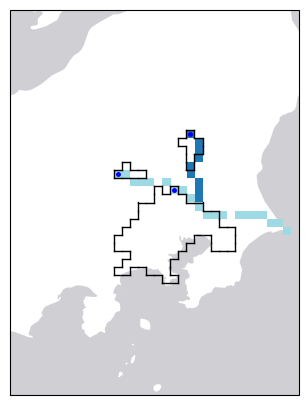

In [194]:
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

def draw_mask_sotowaku(extent, mask_cropped, ax=None, sotowaku_color='#dc143c', linewidth=3):
    projection = ccrs.PlateCarree()
    delta = 360/4320
    x_left = extent[0]
    y_top = extent[3]
    
    upper_indices = []
    lower_indices = []
    left_indices = []
    right_indices = []
    rows, cols = mask_cropped.shape
    for i in range(rows-1):
        for j in range(cols-1):
            if mask_cropped[i, j] != 0:
                if mask_cropped[i-1, j] == 0:
                    upper_indices.append((i, j))
                if mask_cropped[i+1, j] == 0:
                    lower_indices.append((i, j))
                if mask_cropped[i, j-1] == 0:
                    left_indices.append((i, j))
                if mask_cropped[i, j+1] == 0:
                    right_indices.append((i, j))

    for up in upper_indices:
        x_index = x_left + delta*(up[1])
        y_index = y_top - delta*(up[0])
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # top
    for lo in lower_indices:
        x_index = x_left + delta*(lo[1])
        y_index = y_top - delta*(lo[0]+1)
        ax.plot([x_index, x_index+delta], [y_index, y_index], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # bottom
    for le in left_indices:
        x_index = x_left + delta*(le[1])
        y_index = y_top - delta*(le[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # left
    for ri in right_indices:
        x_index = x_left + delta*(ri[1]+1)
        y_index = y_top - delta*(ri[0]+1)
        ax.plot([x_index, x_index], [y_index, y_index+delta], color=sotowaku_color, transform=projection, linewidth=linewidth, zorder=1) # right

    return ax

#
left = 138
right = 141
bottom = 34
top = 38
#
resolution=12
nx, ny = (right - left)*resolution, (top - bottom)*resolution
rgnshape = (ny, nx)
img_extent = (left, right, bottom, top)
extent = (-180, 180, -90, 90)
#
upperindex = (90-top)*resolution
lowerindex = (90-bottom)*resolution
leftindex = (180+left)*resolution
rightindex = (180+right)*resolution
#

projection = ccrs.PlateCarree(central_longitude=0)
fig, ax = plt.subplots(figsize=(5,5), subplot_kw={'projection': projection})
ax.add_feature(cfeature.LAND, edgecolor='none', facecolor='#ffffff')
ax.add_feature(cfeature.OCEAN, edgecolor='none', facecolor='#d0cfd4')
ax.add_feature(cfeature.COASTLINE, linewidth=0.1,edgecolor='#d0cfd4')
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1.5, edgecolor='#d0cfd4')
ax.gridlines(visible=False)
edges, riv_path_array, coords_a, rivnum_list_removed = updown(new_basin_to_cities, key_index=0)
tmp = np.ma.masked_where(riv_path_array == 0, riv_path_array)
im = ax.imshow(tmp, extent=extent, transform=ccrs.PlateCarree(), cmap='tab20')

for city_num in rivnum_list_removed:
    ctymsk_path = f'{msk_dir}/city_{city_num:08}.gl5'
    mask = np.fromfile(ctymsk_path, dtype='float32').reshape(2160, 4320)
    draw_mask_sotowaku(extent, mask, ax=ax, sotowaku_color='black', linewidth=1)
    #prf_path = f'{prf_dir}/vld_cty_/city_{city_num:08}.gl5'
    #prf = np.fromfile(prf_path, dtype='float32').reshape(2160, 4320)

def grid_to_latlon(row, col, extent):
    delta = 360/4320
    x_left, y_top = extent[0], extent[3]
    lon = x_left + (col+0.5) * delta
    lat = y_top - (row+0.5) * delta
    return lon, lat
latlon_coords = [grid_to_latlon(row[0], col[0], extent) for row, col in coords_a]
for lon, lat in latlon_coords:
    ax.plot(lon, lat, marker='o', color='blue', markersize=2.5, transform=ccrs.PlateCarree())

ax.set_xlim(left, right)
ax.set_ylim(bottom, top)

plt.show()